Index(['trustLevel', 'totalScanTimeInSeconds', 'grandTotal', 'lineItemVoids',
       'scansWithoutRegistration', 'quantityModifications',
       'scannedLineItemsPerSecond', 'valuePerSecond',
       'lineItemVoidsPerPosition', 'fraud', 'scannedLineItems'],
      dtype='object')
trustLevel


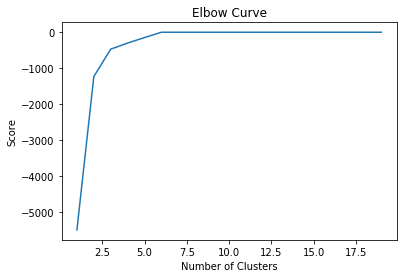

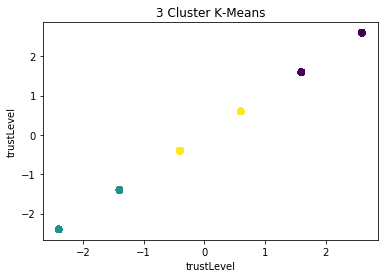

trustLevel->totalScanTimeInSeconds


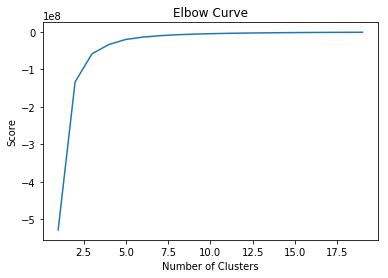

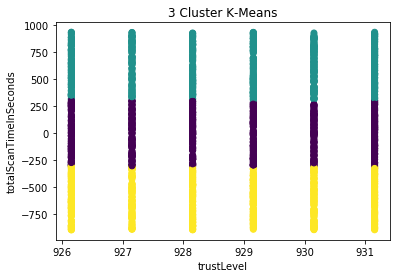

trustLevel->grandTotal


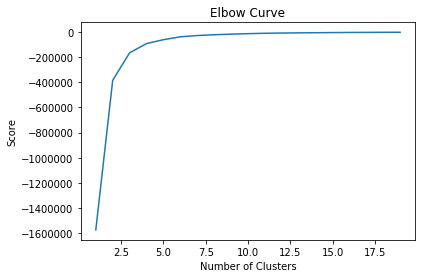

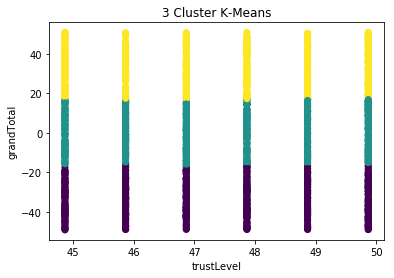

trustLevel->lineItemVoids


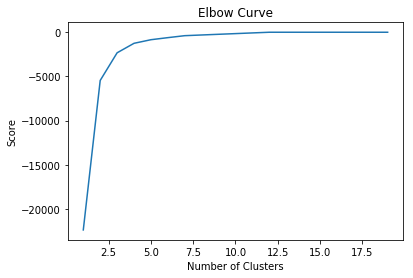

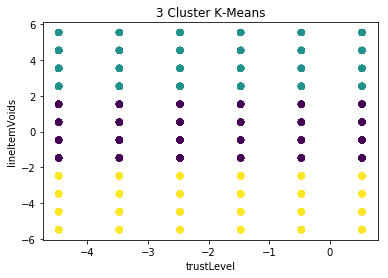

trustLevel->scansWithoutRegistration


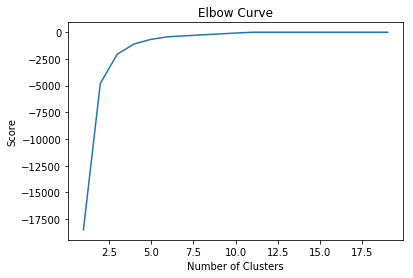

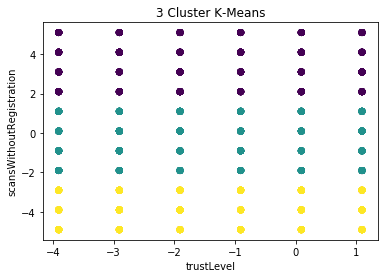

trustLevel->quantityModifications


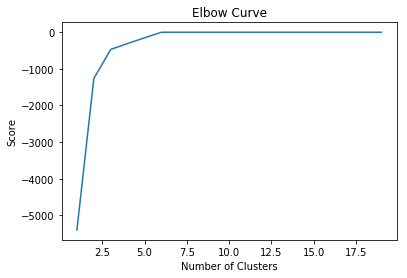

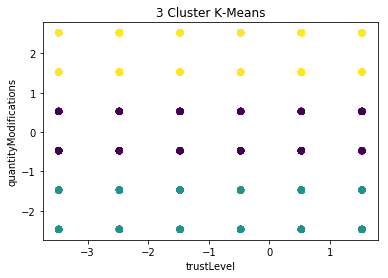

trustLevel->scannedLineItemsPerSecond


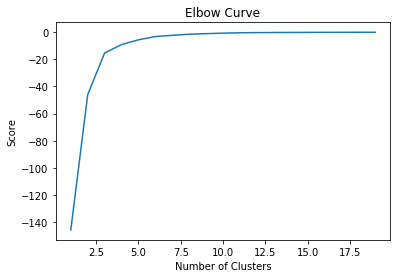

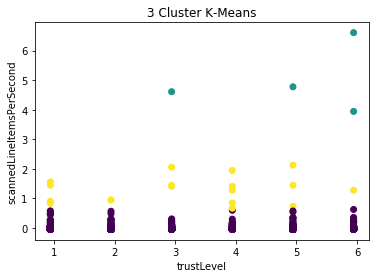

trustLevel->valuePerSecond


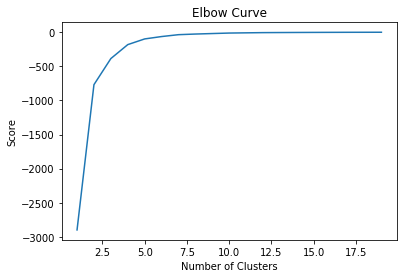

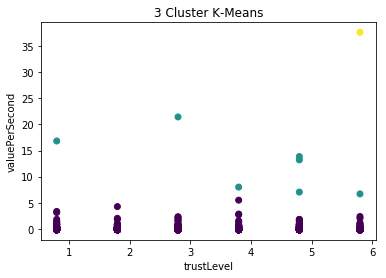

trustLevel->lineItemVoidsPerPosition


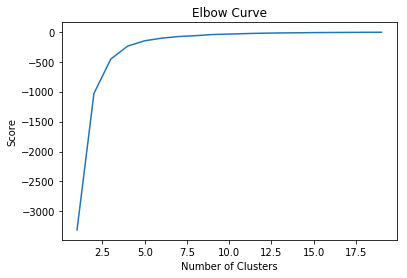

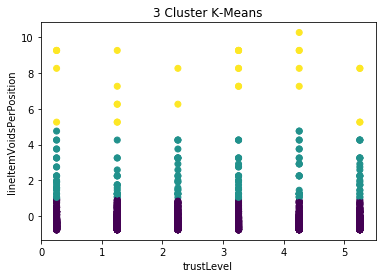

trustLevel->fraud


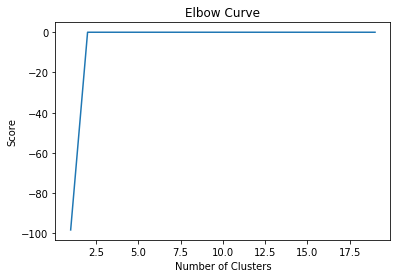

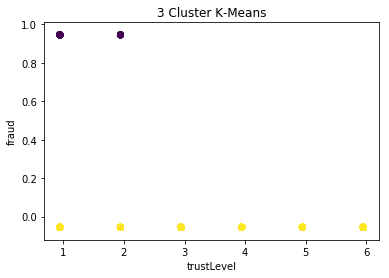

trustLevel->scannedLineItems


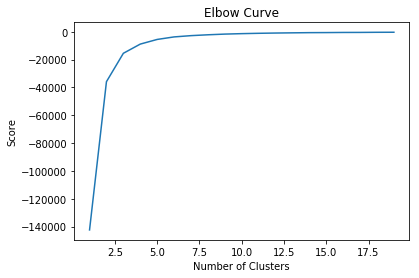

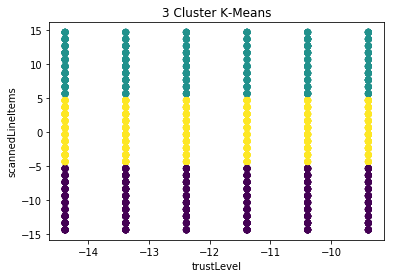

totalScanTimeInSeconds->trustLevel


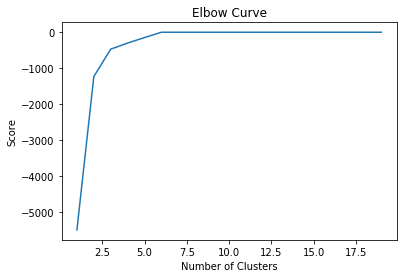

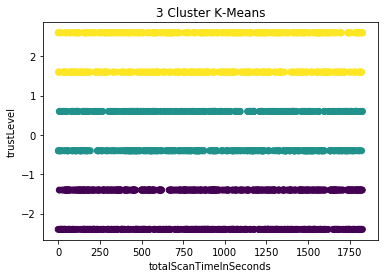

totalScanTimeInSeconds


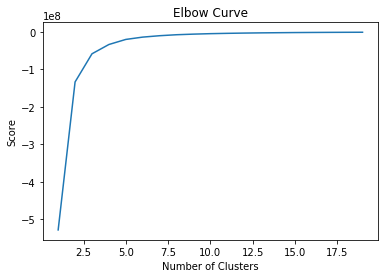

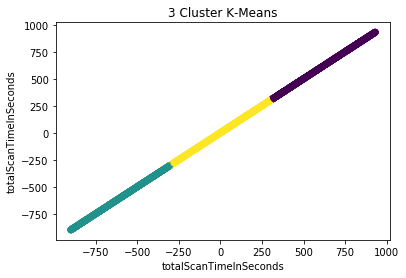

totalScanTimeInSeconds->grandTotal


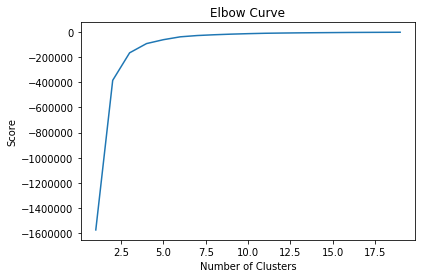

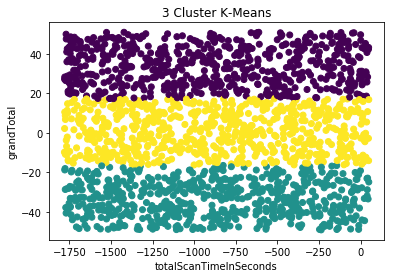

totalScanTimeInSeconds->lineItemVoids


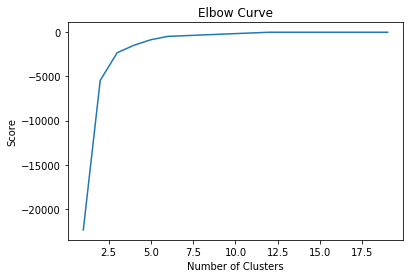

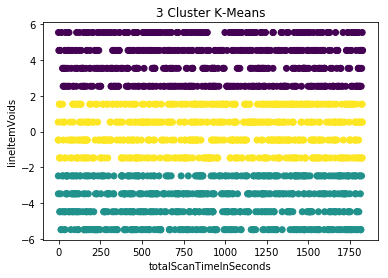

totalScanTimeInSeconds->scansWithoutRegistration


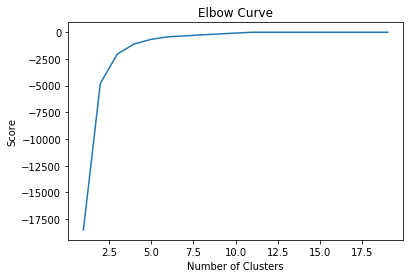

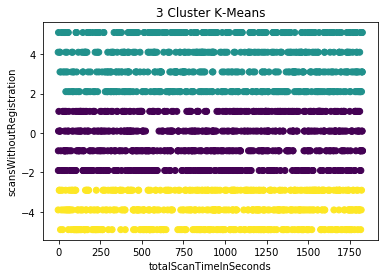

totalScanTimeInSeconds->quantityModifications


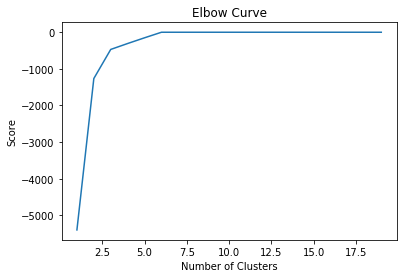

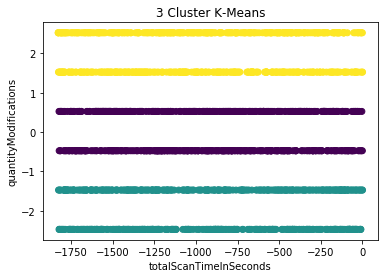

totalScanTimeInSeconds->scannedLineItemsPerSecond


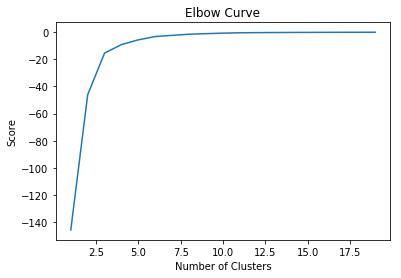

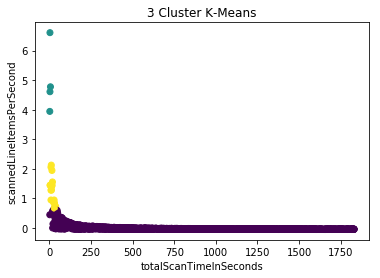

totalScanTimeInSeconds->valuePerSecond


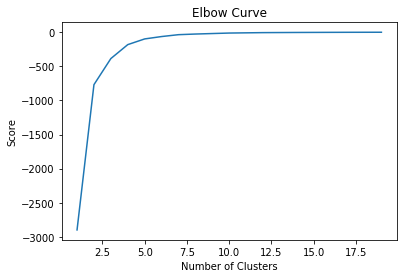

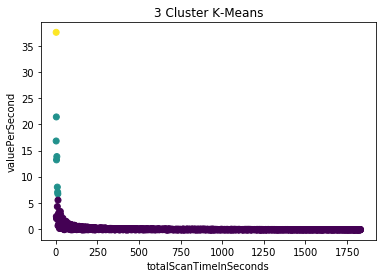

totalScanTimeInSeconds->lineItemVoidsPerPosition


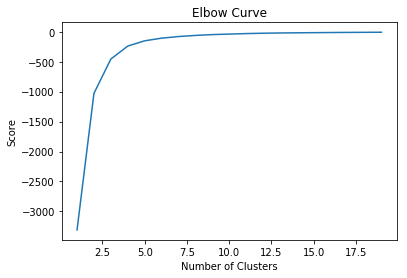

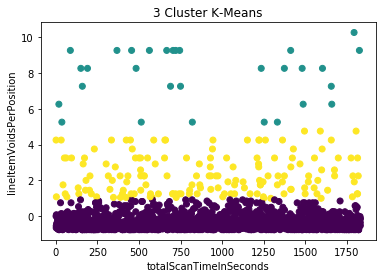

totalScanTimeInSeconds->fraud


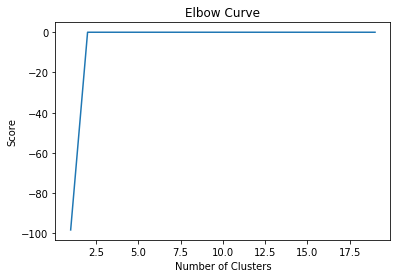

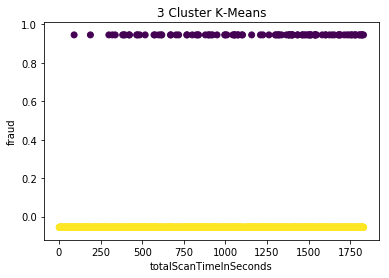

totalScanTimeInSeconds->scannedLineItems


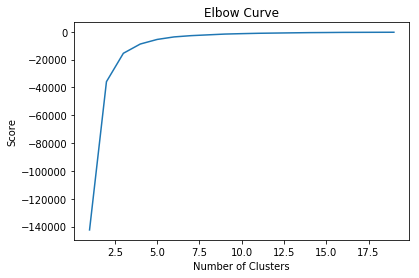

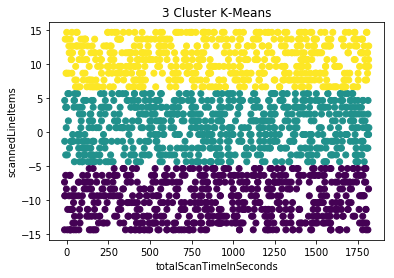

grandTotal->trustLevel


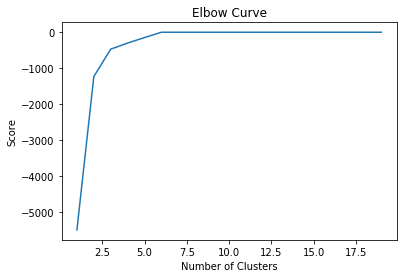

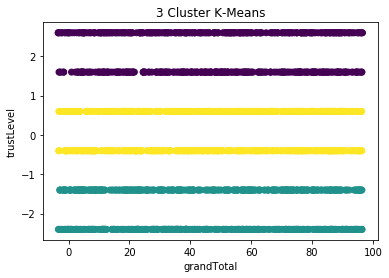

grandTotal->totalScanTimeInSeconds


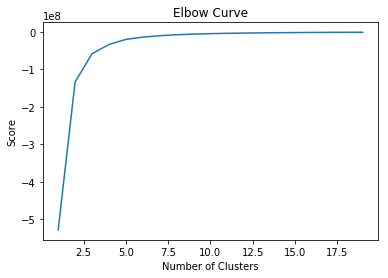

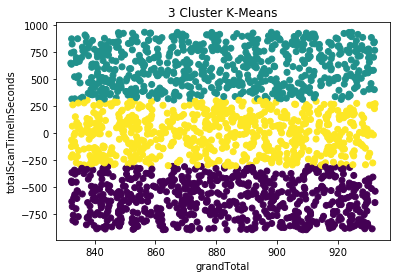

grandTotal


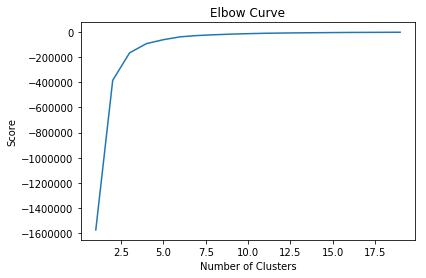

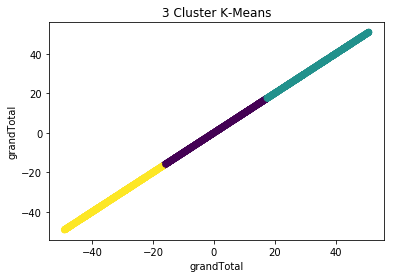

grandTotal->lineItemVoids


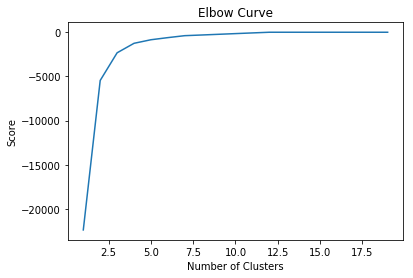

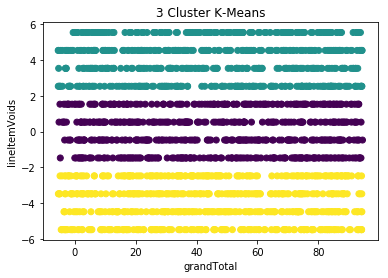

grandTotal->scansWithoutRegistration


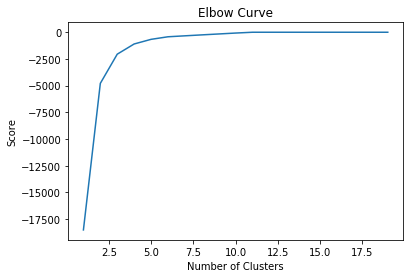

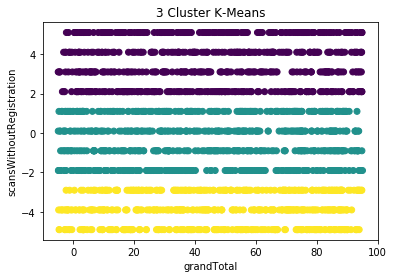

grandTotal->quantityModifications


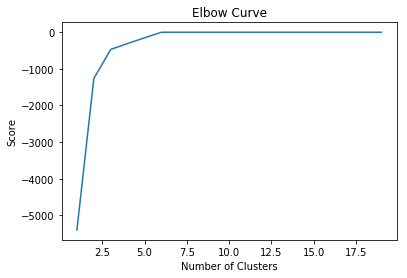

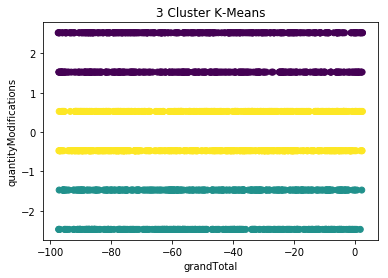

grandTotal->scannedLineItemsPerSecond


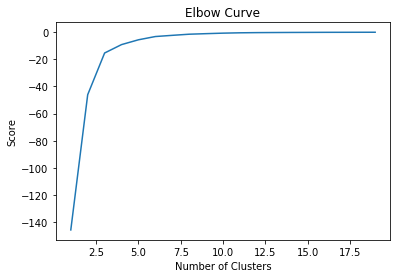

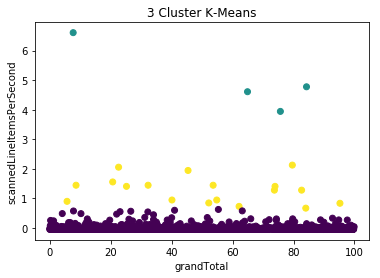

grandTotal->valuePerSecond


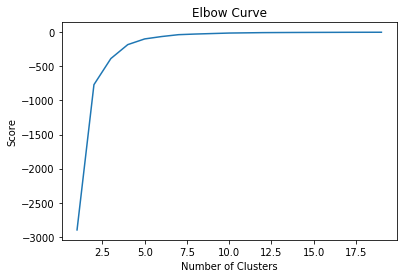

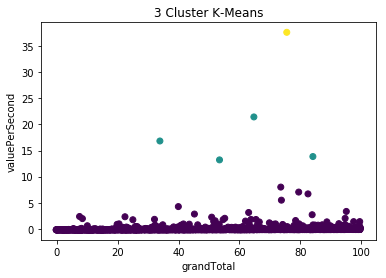

grandTotal->lineItemVoidsPerPosition


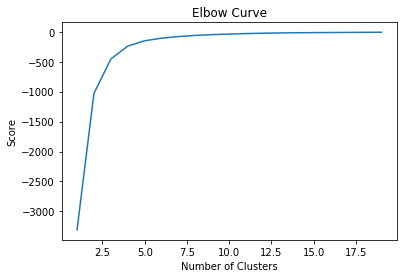

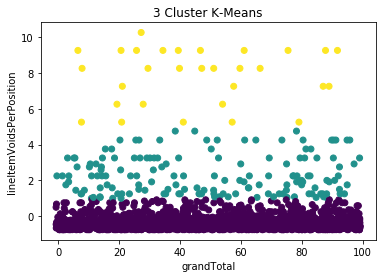

grandTotal->fraud


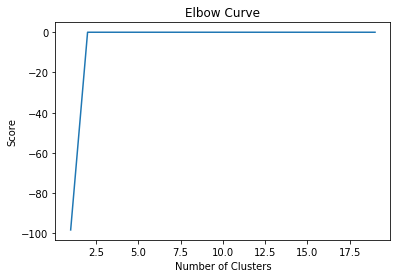

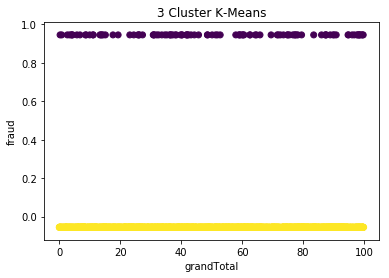

grandTotal->scannedLineItems


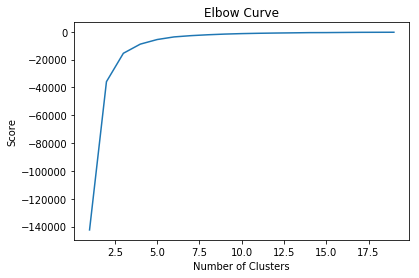

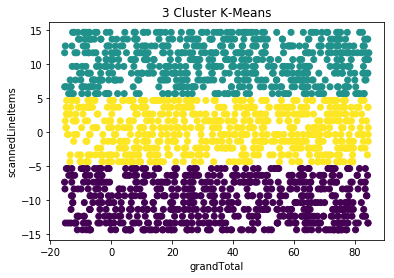

lineItemVoids->trustLevel


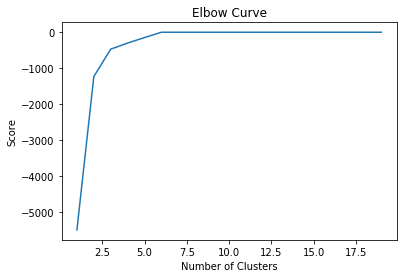

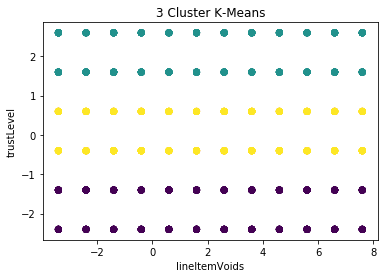

lineItemVoids->totalScanTimeInSeconds


KeyboardInterrupt: 

In [43]:
import pandas as pd
import pylab as pl
import numpy as np
import sys
import warnings
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

if not sys.warnoptions:
    warnings.simplefilter("ignore")

data = pd.read_csv("../../1. Task and Data/train.csv", sep="|")
data['scannedLineItems'] = data['scannedLineItemsPerSecond'] * data['totalScanTimeInSeconds']

#CHOOSE ATTRIBUTES HERE
features = data.columns
print(features)

for feature in features:
    for feature2 in features:
        
        test =  {feature: 1, feature2: 2}
        s = '->'
        print(s.join(test))

        X = data[[feature]]
        Y = data[[feature2]]

        Nc = range(1, 20)
        kmeans = [KMeans(n_clusters=i) for i in Nc]
        kmeans
        score = [kmeans[i].fit(Y).score(Y) for i in range(len(kmeans))]
        score

        pl.plot(Nc,score)
        pl.xlabel('Number of Clusters')
        pl.ylabel('Score')
        pl.title('Elbow Curve')
        pl.show()

        pca = PCA(n_components=1).fit(Y)
        pca_d = pca.transform(Y)
        pca_c = pca.transform(X)

        kmeans=KMeans(n_clusters=3)
        kmeansoutput=kmeans.fit(Y)
        kmeansoutput

        pl.figure('3 Cluster K-Means')
        pl.scatter(pca_c[:, 0], pca_d[:, 0], c=kmeansoutput.labels_)
        pl.xlabel(feature)
        pl.ylabel(feature2)
        pl.title('3 Cluster K-Means')
        pl.show()
